<a href="https://colab.research.google.com/github/zia207/r-colab/blob/main/NoteBook/Advance_Regression/02-05-02-multivariate-statistics-factor-analysis-r.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![alt text](http://drive.google.com/uc?export=view&id=1bLQ3nhDbZrCCqy_WCxxckOne2lgVvn3l)

# 2. Factor Analysis

In this tutorial, we will provide a basic overview of Principal Component Analysis (PCA) and demonstrate how to perform PCA in R. PCA is a statistical technique widely used for data analysis and dimensionality reduction. The primary goal of PCA is to uncover the underlying patterns or structures in a dataset by transforming the original variables into a smaller set of uncorrelated variables, known as principal components.






## Overview

Factor Analysis (FA) is a statistical method used to identify the underlying relationships (factors) between observed variables. It assumes that multiple observed variables can be explained by a smaller number of unobserved latent variables (factors) and that the variability in the observed data is due to these latent variables plus some unique random error.

Mathematical framework of Factor Analysis follows:

1. **Model Representation**:

The factor analysis model can be expressed as:

$$
\mathbf{X} = \mathbf{\Lambda} \mathbf{F} + \mathbf{\epsilon}
$$
where:

- $\mathbf{X} \in \mathbb{R}^p$: A vector of $p$ observed variables.
- $\mathbf{\Lambda} \in \mathbb{R}^{p \times k}$: The **loading matrix**, where each entry $\lambda_{ij}$ represents the loading (influence) of factor $j$ on variable $i$.
- $\mathbf{F} \in \mathbb{R}^k$: A vector of $k$ unobserved latent factors ($k < p$).
- $\mathbf{\epsilon} \in \mathbb{R}^p$: A vector of unique errors for each observed

 2. **Assumptions**:

- The factors $\mathbf{F}$ are uncorrelated: $\text{Cov}(\mathbf{F}) = \mathbf{I}_k$ (identity matrix).
- The errors $\mathbf{\epsilon}$ are uncorrelated with each other and with the factors: $\text{Cov}(\mathbf{\epsilon}) = \mathbf{\Psi}$, where $\mathbf{\Psi}$ is a diagonal matrix.
- Observed variables are related to the factors through linear combinations.

3. **Covariance Structure**:

From the model, the covariance matrix of the observed variables \(\mathbf{X}\) can be expressed as:

$$
\text{Cov}(\mathbf{X}) = \mathbf{\Sigma} = \mathbf{\Lambda} \mathbf{\Lambda}^T + \mathbf{\Psi}
$$
where:

- $\mathbf{\Lambda} \mathbf{\Lambda}^T$: The shared variance explained by the common factors.
- $\mathbf{\Psi}$: The unique variances (specific to each variable).

4. **Variance Decomposition**:

For each variable $i$:

$$
\text{Var}(X_i) = \sum_{j=1}^k \lambda_{ij}^2 + \psi_i
$$

where:

- $\sum_{j=1}^k \lambda_{ij}^2$: The **communality**, or the variance explained by the factors.
- $\psi_i$: The **uniqueness**, or the variance unique to the variable.

 5. **Objective of Factor Analysis**:

- To estimate the loading matrix $\mathbf{\Lambda}$ and the unique variances $\mathbf{\Psi}$.
- To reduce dimensionality and interpret the latent structure in the data.

6. **Factor Extraction**:

There are several methods for extracting factors, including:
- **Principal Factor Method**: Uses the eigenvalues and eigenvectors of the reduced covariance matrix.
- **Maximum Likelihood Estimation (MLE)**: Estimates parameters by maximizing the likelihood of the observed data under the FA model.

7. **Factor Rotation**:

After extraction, the factors can be rotated to achieve a simpler and more interpretable structure:
- **Orthogonal Rotation** (e.g., Varimax): Keeps the factors uncorrelated.
- **Oblique Rotation** (e.g., Promax): Allows factors to be correlated.

8. **Goodness of Fit**:

To assess the fit of the factor model, compare the model-implied covariance matrix $\mathbf{\Sigma}$ with the observed covariance matrix using measures such as:

- **Kaiser-Meyer-Olkin (KMO) statistic**: Measures sampling adequacy for factor analysis.
- **Bartlett's Test of Sphericity**: Tests the null hypothesis that the variables are uncorrelated.


Factor analysis is widely used in psychology, social sciences, finance, and other fields to uncover latent structures and simplify complex datasets.



## Install rpy2

In [1]:
!pip uninstall rpy2 -y
!pip install rpy2==3.5.1
%load_ext rpy2.ipython

Found existing installation: rpy2 3.4.2
Uninstalling rpy2-3.4.2:
  Successfully uninstalled rpy2-3.4.2
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 201.7/201.7 kB 4.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for rpy2: filename=rpy2-3.5.1-cp311-cp311-linux_x86_64.whl size=314980 sha256=5634f2a35f2441fb1c63ff35c4ea897bfb0f56738134fc63195ed27029601967
  Stored in directory: /root/.cache/pip/wheels/e9/55/d1/47be85a5f3f1e1f4d1e91cb5e3a4dcb40dd72147f184c5a5ef
Successfully built rpy2


## Mount Google Drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Factor Analysis  from Scratch

We will implement Factor Analysis from scratch in R to understand the underlying concepts and algorithms. We will generate synthetic data, compute the correlation matrix, and estimate the factor loadings and unique variances using Maximum Likelihood and Minimum Residual methods.

### Generate Synthetic Data

Let's generate some synthetic data to demonstrate Factor Analysis. We will create a dataset with 6 observed variables influenced by 2 latent factors. The observed variables will be generated as linear combinations of the latent factors with some added noise.

In [ ]:
%%R
# Generate synthetic data
set.seed(123) # For reproducibility
n <- 200  # Number of observations
p <- 6    # Number of variables

# Generate latent factors
factor1 <- rnorm(n)
factor2 <- rnorm(n)

# Create observed variables influenced by the factors
X <- data.frame(
  V1 = 0.8 * factor1 + 0.2 * rnorm(n),
  V2 = 0.7 * factor1 + 0.3 * rnorm(n),
  V3 = 0.6 * factor1 + 0.4 * rnorm(n),
  V4 = 0.7 * factor2 + 0.3 * rnorm(n),
  V5 = 0.8 * factor2 + 0.2 * rnorm(n),
  V6 = 0.6 * factor2 + 0.4 * rnorm(n)
)
head(X)

          V1          V2         V3          V4          V5         V6
1 -0.4630917 -0.07012927 -0.1937720  1.24042763  1.88301829  0.8848389
2 -0.4178723 -0.16932833 -0.4013106  0.60670257  0.89842835  0.5213267
3  1.1200170  1.08109672  1.2773059 -0.19099561 -0.04181111  0.1268523
4  0.0506384 -0.40546441  0.5034795  0.34058330  0.28496925  0.1532520
5  0.2375694  0.32761702  0.1880825 -1.05484080 -0.20542399 -0.1575580
6  1.0419427  1.13732524  1.0866809 -0.02120079 -0.16166519  0.2322302


### Center the Data



In [ ]:
%%R
# Center the data
X_scale<- scale(X, center = TRUE, scale = FALSE)



### Compute Correlation  Matrix

The next step is to compute the correlation matrix of the centered data.




In [ ]:
%%R
# Compute the correlation matrix
R <- cor(X_scale)
R

            V1           V2         V3          V4           V5          V6
V1  1.00000000  0.877874232 0.76677643 -0.01294144 -0.052094216 -0.01321996
V2  0.87787423  1.000000000 0.70296402  0.03014416 -0.003693208  0.01919607
V3  0.76677643  0.702964019 1.00000000  0.03225977  0.044670131  0.04355680
V4 -0.01294144  0.030144156 0.03225977  1.00000000  0.902855278  0.79794504
V5 -0.05209422 -0.003693208 0.04467013  0.90285528  1.000000000  0.81138965
V6 -0.01321996  0.019196075 0.04355680  0.79794504  0.811389651  1.00000000


### Kaiser-Meyer-Olkin (KMO) Measure

The Kaiser-Meyer-Olkin (KMO) measure is a statistic that indicates the degree to which the variables in the dataset are suitable for factor analysis. It is a measure of sampling adequacy, with values between 0 and 1. Higher values indicate that the variables are more suitable for factor analysis.


In [ ]:
%%R
# Kaiser-Meyer-Olkin (KMO) Measure
kmo <- function(R) {
  R_inv <- solve(R)
  partial_corr <- -R_inv / sqrt(outer(diag(R_inv), diag(R_inv)))
  diag(partial_corr) <- 0

  numerator <- sum(R^2) - sum(diag(R)^2)
  denominator <- numerator + sum(partial_corr^2)

  KMO <- numerator / denominator

  individual_kmo <- colSums(R^2) - diag(R)^2
  individual_kmo <- individual_kmo / (individual_kmo + colSums(partial_corr^2))

  return(list(KMO = KMO, individual = individual_kmo))
}

kmo_result <- kmo(R)
cat("Overall KMO Measure:", kmo_result$KMO, "\n")
cat("Individual KMO Measures:\n")
print(kmo_result$individual)

Overall KMO Measure: 0.7198511 
Individual KMO Measures:
       V1        V2        V3        V4        V5        V6 
0.6370567 0.6953375 0.8098881 0.7014303 0.6788390 0.8735113 


### Maximum Likelihood Factor Analysis

We will implement Maximum Likelihood Factor Analysis from scratch using the iterative algorithm to estimate the factor loadings and unique variances. The algorithm involves iteratively updating the factor loadings and communalities until convergence.

In [ ]:
%%R
# Maximum Likelihood Factor Analysis
ml_factor_analysis <- function(R, n_factors, max_iter = 100, tol = 1e-6) {
  p <- ncol(R)
  diag_R <- diag(R)
  communality <- diag_R

  for (i in 1:max_iter) {
    # Spectral decomposition
    eig <- eigen(R - diag(diag_R - communality))
    loadings <- eig$vectors[, 1:n_factors] %*% diag(sqrt(eig$values[1:n_factors]))

    # Update communalities
    new_communality <- rowSums(loadings^2)

    # Check convergence
    if (max(abs(new_communality - communality)) < tol) {
      break
    }

    communality <- new_communality
  }

  uniqueness <- diag_R - communality
  return(list(loadings = loadings, uniqueness = uniqueness, communality = communality))
}

ml_result <- ml_factor_analysis(R, n_factors = 2)
cat("\nMaximum Likelihood Factor Loadings:\n")
print(ml_result$loadings)
cat("\nUnique Variances:\n")
print(ml_result$uniqueness)


Maximum Likelihood Factor Loadings:
           [,1]       [,2]
[1,] -0.1018410  0.9755628
[2,] -0.1355767  0.8860696
[3,] -0.1476192  0.7704355
[4,] -0.9339530 -0.1168696
[5,] -0.9488113 -0.1440653
[6,] -0.8402762 -0.1039804

Unique Variances:
        V1         V2         V3         V4         V5         V6 
0.03790653 0.19649917 0.38463754 0.11407325 0.07900237 0.28312396 


### Minimum Residual Factor Analysis

We will also implement Minimum Residual Factor Analysis from scratch using the iterative algorithm to estimate the factor loadings and unique variances. The algorithm involves iteratively updating the factor loadings and communalities until convergence.


In [ ]:
%%R
# Minimum Residual Factor Analysis
minres_factor_analysis <- function(R, n_factors, max_iter = 100, tol = 1e-6) {
  p <- ncol(R)
  diag_R <- diag(R)
  communality <- diag_R

  for (i in 1:max_iter) {
    # Reduce the correlation matrix
    reduced_R <- R - diag(diag_R - communality)

    # Spectral decomposition
    eig <- eigen(reduced_R)
    loadings <- eig$vectors[, 1:n_factors] %*% diag(sqrt(eig$values[1:n_factors]))

    # Update communalities
    new_communality <- rowSums(loadings^2)

    # Check convergence
    if (max(abs(new_communality - communality)) < tol) {
      break
    }

    communality <- new_communality
  }

  uniqueness <- diag_R - communality
  return(list(loadings = loadings, uniqueness = uniqueness, communality = communality))
}

minres_result <- minres_factor_analysis(R, n_factors = 2)
cat("\nMinimum Residual Factor Loadings:\n")
print(minres_result$loadings)
cat("\nUnique Variances:\n")
print(minres_result$uniqueness)



Minimum Residual Factor Loadings:
           [,1]       [,2]
[1,] -0.1018410  0.9755628
[2,] -0.1355767  0.8860696
[3,] -0.1476192  0.7704355
[4,] -0.9339530 -0.1168696
[5,] -0.9488113 -0.1440653
[6,] -0.8402762 -0.1039804

Unique Variances:
        V1         V2         V3         V4         V5         V6 
0.03790653 0.19649917 0.38463754 0.11407325 0.07900237 0.28312396 


## Factor Analysis in R

In R, Factor Analysis can be performed using the {psych} package, which provides functions for both exploratory and confirmatory factor analysis. The {lavaan} package can be used for structural equation modeling, including confirmatory factor analysis.

### Install Required R Packages

Following R packages are required to run this notebook. If any of these packages are not installed, you can install them using the code below:

In [3]:
%%R
packages <- c('tidyverse',
              'plyr',
              'corrr',
              'ggcorrplot',
              'factoextra',
              'ade4',
              'psych',
              'FactoMineR',
              'lavaan',
              'scico'
		 )

In [ ]:
%%R
# Install missing packages
new.packages <- packages[!(packages %in% installed.packages(lib='drive/My Drive/R/')[,"Package"])]
if(length(new.packages)) install.packages(new.packages, lib='drive/My Drive/R/')

In [4]:
%%R
# set library path
.libPaths('drive/My Drive/R')
# Verify installation
cat("Installed packages:\n")
print(sapply(packages, requireNamespace, quietly = TRUE))


Installed packages:
 tidyverse       plyr      corrr ggcorrplot factoextra       ade4      psych 
      TRUE       TRUE       TRUE       TRUE       TRUE       TRUE       TRUE 
FactoMineR     lavaan      scico 
      TRUE       TRUE       TRUE 


### Load R Packages

In [5]:
%%R
# set library path
.libPaths('drive/My Drive/R')
# Load packages with suppressed messages
invisible(lapply(packages, function(pkg) {
  suppressPackageStartupMessages(library(pkg, character.only = TRUE))
}))
# Check loaded packages
cat("Successfully loaded packages:\n")
print(search()[grepl("package:", search())])# Check loaded packages

Successfully loaded packages:
 [1] "package:scico"      "package:lavaan"     "package:FactoMineR"
 [4] "package:psych"      "package:ade4"       "package:factoextra"
 [7] "package:ggcorrplot" "package:corrr"      "package:plyr"      
[10] "package:lubridate"  "package:forcats"    "package:stringr"   
[13] "package:dplyr"      "package:purrr"      "package:readr"     
[16] "package:tidyr"      "package:tibble"     "package:ggplot2"   
[19] "package:tidyverse"  "package:tools"      "package:stats"     
[22] "package:graphics"   "package:grDevices"  "package:utils"     
[25] "package:datasets"   "package:methods"    "package:base"      


### Data

In this exercise we will use following data set PCA analysis. This dataset contains heavy metal concentration in the soil of USA.

[usa_geochemical_FA.csv](https://www.dropbox.com/s/pfc6v0dy62fx50u/usa_geochemical_FA.csv?dl=0)


We will use `read_csv()` function of {readr} package to import data as a **tidy** data from my github repository. The `glimpse()` function from {dplyr} package can be used to get a quick overview of the data

In [ ]:
%%R
# Load data
mf<-readr::read_csv("https://github.com/zia207/r-colab/raw/main/Data/Regression_analysis/usa_geochemical_FA.csv")
glimpse(mf)

Rows: 4813 Columns: 28
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (3): A_LabID, StateID, LandCover
dbl (25): SiteID, Latitude, Longitude, Al, As, Ba, Cd, Ce, Co, Cr, Cs, Cu, F...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 4,813
Columns: 28
$ A_LabID   <chr> "C-320500", "C-299963", "C-319572", "C-355112", "C-319622", …
$ SiteID    <dbl> 847, 7209, 6811, 4072, 4315, 12782, 10830, 252, 1964, 6920, …
$ StateID   <chr> "NV", "ME", "CO", "WI", "CO", "MT", "WA", "PA", "IN", "MO", …
$ Latitude  <dbl> 38.8486, 44.2417, 37.8284, 42.7492, 39.2340, 46.3279, 46.499…
$ Longitude <dbl> -117.5824, -70.4833, -107.6216, -90.2205, -106.2517, -112.90…
$ LandCover <chr> "Shrubland", "Forested Upland", "Shrubland", "Forested Uplan…
$ Al        <dbl> 7.43, 5.35, 5.82, 4.61, 6.24, 3.76, 6.99, 7.53, 9.06, 3.02, …
$ As        <dbl> 195.0,

#### Data normalization

First we will create a subset of the numeric variables from the dataset:

In [ ]:
%%R
df<- mf[,7:28]

In R, `scale()` is generic function whose default method centers and/or scales the columns of a numeric matrix.

In [ ]:
%%R
df_scale <- as.data.frame(scale(df, center=TRUE, scale=TRUE))
describe(df_scale)

   vars    n mean sd median trimmed  mad   min   max range  skew kurtosis   se
Al    1 4813    0  1   0.03    0.01 1.00 -2.15  5.08  7.24  0.04    -0.08 0.01
As    2 4813    0  1  -0.07   -0.06 0.17 -0.32 56.16 56.49 42.86  2214.48 0.01
Ba    3 4813    0  1  -0.03   -0.04 0.90 -1.78 14.97 16.76  1.89    17.11 0.01
Cd    4 4813    0  1  -0.08   -0.08 0.19 -0.28 59.91 60.18 47.05  2713.71 0.01
Ce    5 4813    0  1  -0.04   -0.06 0.80 -2.01 16.55 18.56  2.45    22.93 0.01
Co    6 4813    0  1  -0.16   -0.13 0.62 -1.11 21.37 22.48  6.02    88.32 0.01
Cr    7 4813    0  1  -0.07   -0.08 0.20 -0.41 42.69 43.10 30.67  1126.12 0.01
Cs    8 4813    0  1  -0.30   -0.19 0.00 -0.30 34.33 34.63 14.81   391.23 0.01
Cu    9 4813    0  1  -0.07   -0.06 0.12 -0.26 67.14 67.40 62.95  4218.14 0.01
Fe   10 4813    0  1  -0.14   -0.11 0.74 -1.50  8.04  9.54  1.96     7.56 0.01
Hg   11 4813    0  1  -0.12   -0.08 0.09 -0.20 47.15 47.35 35.25  1446.40 0.01
Li   12 4813    0  1  -0.12   -0.10 0.72 -1.48 20.48

We will compute the correlation matrix  using `cor()` function from the {corrr} package and `ggcorrplot()` can be applied then for better visualization


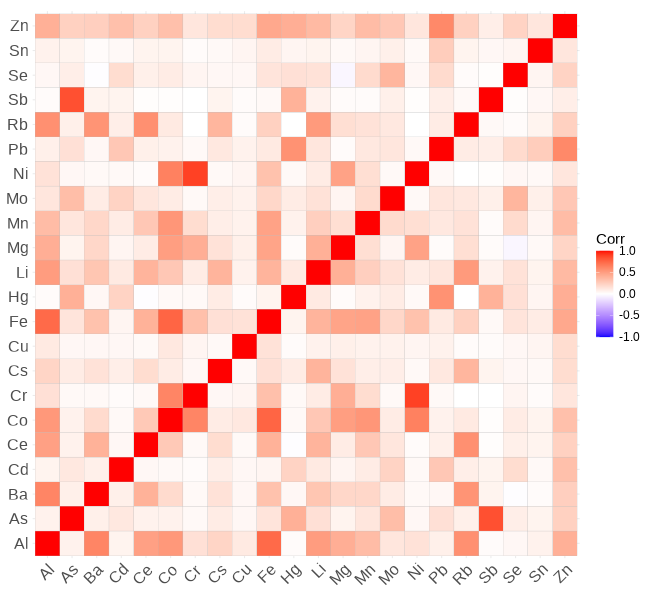

In [ ]:
%%R -w 650 -h 600 -u px
corr_matrix <- cor(df_scale)
ggcorrplot(corr_matrix)


The result of the correlation matrix can be interpreted as follow:

-   The higher the value, the most positively correlated the two variables are.

-   The closer the value to -1, the most negatively correlated they are.

### Exploratory Factor Analysis

#### Kaiser-Meyer-Olkin (KMO)

Kaiser-Meyer-Olkin (KMO) is a statistical measure used to assess the sampling adequacy of a set of variables for factor analysis. It is named after the three researchers who developed it: Henry Kaiser, J.B. Meyer, and Norbert Olkin. The KMO statistic is a value between 0 and 1, with higher values indicating better sampling adequacy. A KMO value of 0.5 or lower is considered unacceptable, while a value of 0.6 to 0.7 is marginal, and values above 0.8 are generally considered good. The KMO statistic is calculated by comparing the magnitude of the correlation coefficients between pairs of variables to the magnitude of the partial correlations between those variables, controlling for all other variables in the analysis. If the correlation coefficients are much larger than the partial correlations, then the KMO statistic will be high, indicating that the variables are suitable for factor analysis.

The KMO statistic is widely used in the field of psychology and social sciences to assess the quality of data for factor analysis. It is an important tool for researchers to evaluate the suitability of their data for factor analysis and to make decisions about how to proceed with their analysis.

In R, you can compute the Kaiser-Meyer-Olkin (KMO) statistic using `KMO()` function of the {psych} package. Here's an example:

In [ ]:
%%R
# compute the KMO statistic
KMO(r=cor(df_scale))

Kaiser-Meyer-Olkin factor adequacy
Call: KMO(r = cor(df_scale))
Overall MSA =  0.74
MSA for each item = 
  Al   As   Ba   Cd   Ce   Co   Cr   Cs   Cu   Fe   Hg   Li   Mg   Mn   Mo   Ni 
0.79 0.54 0.80 0.87 0.84 0.82 0.71 0.80 0.84 0.77 0.78 0.83 0.84 0.82 0.57 0.66 
  Pb   Rb   Sb   Se   Sn   Zn 
0.66 0.75 0.50 0.65 0.57 0.84 


According to Kaiser’s (1974) guidelines, a suggested cutoff for determining the factorability of the sample data is `KMO ≥ 60`. The total `KMO is 0.74`, indicating that, based on this test, we can probably conduct a factor analysis.


#### Bartlett's Test of Sphericity

Bartlett's Test of Sphericity is a statistical test used to determine whether a correlation matrix is significantly different from an identity matrix. It is commonly used in factor analysis to assess whether the variables in a dataset are suitable for dimensionality reduction.

The null hypothesis of Bartlett's test is that the variables are uncorrelated in the population, while the alternative hypothesis is that they are correlated. If the test statistic is large and the p-value is small (e.g., less than 0.05), then we reject the null hypothesis and conclude that the correlation matrix is significantly different from an identity matrix, and therefore the variables are correlated.

In R, you can perform Bartlett's test of sphericity using `bartlett()` function ofthe {psych} package. Here's an example:

In [ ]:
%%R
cortest.bartlett(df_scale)

$chisq
[1] 53549.84

$p.value
[1] 0

$df
[1] 231



Small values (`p < 0.05`) of the significance level indicate that a factor analysis may be useful with our data.

#### Determine Number of Factors to Extract

Since we are seeking latent structure within a set of data, we will only be interested in factors that explain a substantial proportion of variation within the data. One way to determine the number of factors or components in a data matrix or a correlation matrix is to examine the `scree()` of {psych} package plot of the successive eigenvalues. Sharp breaks in the plot suggest the appropriate number of components or factors to extract. First we use `eigen()` function from R-base to computes eigenvalues and eigenvectors and plot the successive eigen values for a scree test using scree() function:


In [ ]:
%%R
ev <- eigen(cor(df_scale)) # get eigenvalues
ev$values

 [1] 5.16673191 2.65225466 2.29148907 1.59301574 1.27836437 1.11969756
 [7] 0.99261922 0.98195391 0.88608815 0.78823343 0.72787642 0.62310820
[13] 0.58619098 0.51085986 0.40663713 0.35703075 0.29902045 0.25368764
[19] 0.15785633 0.13227153 0.10380504 0.09120766


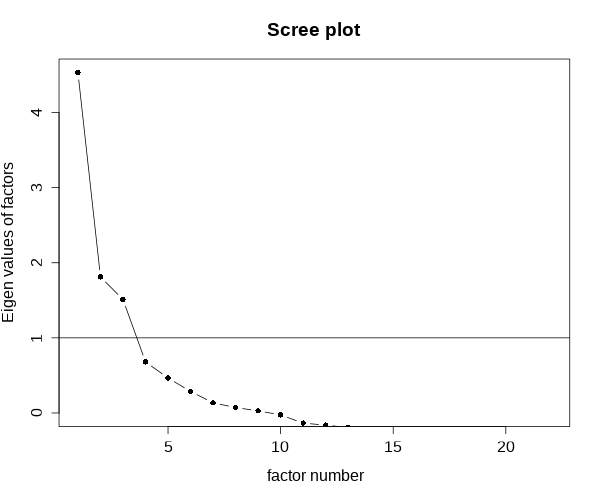

In [ ]:
%%R -h 500 -w 600 -u px
scree(df_scale, pc=FALSE)  # Use pc=FALSE for factor analysis

Parallel" analysis is an alternative technique that compares the scree of factors of the observed data with that of a random data matrix of the same size as the original. This may be done for continuous , dichotomous, or polytomous data using Pearson, tetrachoric or polychoric correlations. We will use `fa.parallel()` of {psych} package:

Parallel analysis suggests that the number of factors =  8  and the number of components =  6 


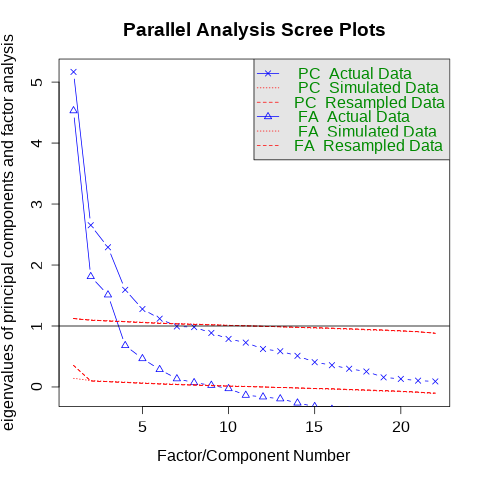

In [ ]:
%%R
fa.parallel(df_scale)

### Factor analysis using `fa()` method

`fa()` function of {psych} package performs exploratory Factor analysis using `MinRes` (minimum residual) as well as following factoring methods (`fm`):

`fm="minres"` will do a minimum residual as will fm="uls". Both of these use a first derivative.

`fm="ols"` differs very slightly from "minres" in that it minimizes the entire residual matrix using an OLS procedure but uses the empirical first derivative. This will be slower.

`fm="wls"` will do a weighted least squares (WLS) solution,

`fm="gls"` does a generalized weighted least squares (GLS),

`fm="pa"` will do the principal factor solution,

`fm="ml"` will do a maximum likelihood factor analysis.

`fm="minchi"`will minimize the sample size weighted chi square when treating pairwise correlations with different number of subjects per pair.

`fm ="minrank"` will do a minimum rank factor analysis. .

`fm="alpha"`will do alpha factor analysis as described in Kaiser and Coffey (1965)

We use the `fa()` function to perform factor analysis on the scaled data. We specify the number of factors to extract (`nfactors = 8`) and the factorization method (`fm = "pa"` for principal axis factoring). We also specify the rotation method (`rotate = "varimax"`) to simplify the factor loadings and make them easier to interpret. The `rotate` parameter specifies the rotation method to be used. Other popular rotation methods include `oblimin`" and `promax`.



In [ ]:
%%R
fa_result <- fa(r=df_scale,
              nfactors = 8,
              fm="pa", # principal axis
              rotate="varimax")
#to show the loadings sorted by absolute value
print(fa_result, sort=TRUE)

Factor Analysis using method =  pa
Call: fa(r = df_scale, nfactors = 8, rotate = "varimax", fm = "pa")
Standardized loadings (pattern matrix) based upon correlation matrix
   item   PA1   PA6   PA3  PA4   PA2  PA7   PA5   PA8    h2       u2 com
Fe   10  0.79  0.20  0.28 0.10  0.03 0.13  0.09  0.21 0.815  0.18500 1.7
Co    6  0.77  0.54  0.10 0.05  0.00 0.08  0.00  0.00 0.914  0.08589 1.9
Mn   14  0.56  0.09  0.14 0.13  0.03 0.06  0.16 -0.13 0.409  0.59112 1.6
Cu    9  0.13  0.02  0.01 0.09  0.01 0.02  0.05  0.09 0.036  0.96436 3.1
Ni   16  0.14  0.99 -0.01 0.03  0.01 0.01  0.02  0.05 1.000 -0.00027 1.0
Cr    7  0.19  0.87 -0.01 0.03  0.00 0.02  0.01  0.00 0.789  0.21070 1.1
Mg   13  0.29  0.43  0.10 0.01  0.01 0.32 -0.06  0.41 0.547  0.45318 3.8
Rb   18 -0.04  0.02  0.81 0.07  0.00 0.43  0.05 -0.12 0.870  0.12975 1.6
Al    1  0.54  0.06  0.68 0.08 -0.01 0.18 -0.03  0.34 0.903  0.09664 2.7
Ba    3  0.15  0.00  0.67 0.06  0.04 0.06  0.00  0.16 0.508  0.49227 1.3
Ce    5  0.29 -0.02  0.56

#### Plot Factor Loading Matrices

Factor analysis or principal components analysis results are typically interpreted in terms of the major loadings on each factor. These structures may be represented as a table of loadings or graphically, where all loadings with an absolute value \> some cut point are represented as an edge (path). fa.diagram uses the various diagram functions to draw the diagram. The default is to use the `fa.diagram()` function from the {psych}m package.

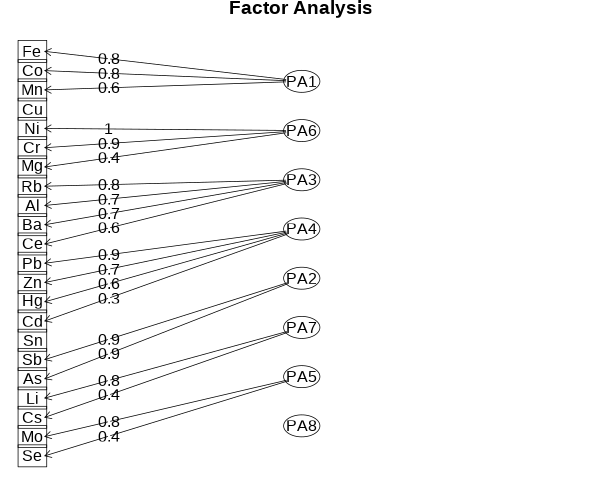

In [ ]:
%%R -h 500 -w 600 -u px
fa.diagram(fa_result)


### Factor analysis using the `factanal()` method

The function `factanal()` from {stats} pcakge perform `maximum-likelihood` factor analysis on a covariance matrix or data matrix. We will apply a `rotation` to the factors to make them reduce the complexity of the factor loadings and make them easier to interpret, here we’ll use the varimax option. `Varimax` maximizes the sum of the variances of the squared loadings. Then we’ll print the model to see the results (and sort so the loadings are ordered). The output may be a bit long.

In [ ]:
%%R
factanal_results <- factanal(df_scale,
                     factors = 8,
                     scores = "Bartlett",
                     rotation = "varimax")
print(factanal_results, sort = TRUE)


Call:
factanal(x = df_scale, factors = 8, scores = "Bartlett", rotation = "varimax")

Uniquenesses:
   Al    As    Ba    Cd    Ce    Co    Cr    Cs    Cu    Fe    Hg    Li    Mg 
0.015 0.107 0.500 0.836 0.516 0.096 0.199 0.755 0.968 0.175 0.481 0.277 0.518 
   Mn    Mo    Ni    Pb    Rb    Sb    Se    Sn    Zn 
0.565 0.203 0.005 0.189 0.154 0.125 0.786 0.942 0.355 

Loadings:
   Factor1 Factor2 Factor3 Factor4 Factor5 Factor6 Factor7 Factor8
Co  0.766   0.539   0.116                                         
Fe  0.801   0.203   0.290                   0.117           0.155 
Mn  0.576           0.127   0.114                   0.133  -0.208 
Cr  0.184   0.875                                                 
Ni  0.140   0.987                                                 
Al  0.549           0.713                   0.168           0.366 
Ba  0.141           0.673                                   0.135 
Ce  0.256           0.553                   0.223          -0.236 
Rb               

The p-value is below 0.05 or 0.01 we can reject the hypothesis of perfect fit, meaning that we could probably try a different method or try a different number of factors.

#### Extract Loading and plot them

We’ll get the results from the factor analysis model we using the `tidy()` function from broom package and convert it to long format and create a weight matrix.

In [ ]:
%%R
fa_weight_matrix <- broom::tidy(factanal_results) %>%
  pivot_longer(starts_with("fl"), names_to = "factor", values_to = "loading")

#### Plot loading

We can now plot the factor loadings using a heatmap. We’ll use the `geom_tile()` function from {ggplot2} to create a heatmap of the factor loadings. We’ll use the {scico} package to create a color palette for the heatmap.

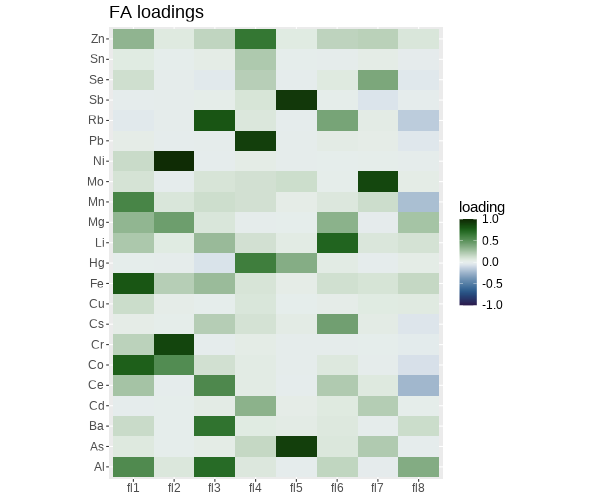

In [ ]:
%%R -w 600 -h 500 -u px
fa_loading_plot <- ggplot(fa_weight_matrix, aes(x = factor, y = variable, fill = loading)) +
  geom_tile() +
  labs(title = "FA loadings",
       x = NULL,
       y = NULL) +
  scico::scale_fill_scico(palette = "cork", limits = c(-1,1)) +
  coord_fixed(ratio = 1/2)
print(fa_loading_plot)

#### Correlation among Bartlett’s scores

We’ll take the `Bartlett’s score`s and correlate them with each other much like before and create a correlation matrix like before.

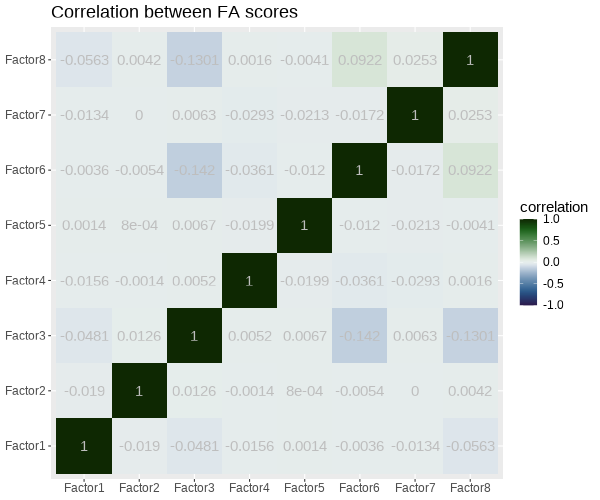

In [ ]:
%%R -w 600 -h 500 -u px
factanal_results$scores %>%
  cor() %>%
  data.frame() %>%
  rownames_to_column("factor_x") %>%
  pivot_longer(cols = -factor_x, names_to = "factor_y", values_to = "correlation") %>%
  ggplot(aes(x = factor_x, y = factor_y, fill = correlation)) +
  geom_tile() +
  geom_text(aes(label = round(correlation,4)), color = "grey") +
  labs(title = "Correlation between FA scores",
       x = NULL,
       y = NULL) +
  scico::scale_fill_scico(palette = "cork", limits = c(-1,1)) +
  coord_equal()

We can see little correlation but certainly a few non-zero correlations also.

### Confirmatory Factor Analysis (CFA)

Confirmatory Factor Analysis (CFA) is a statistical technique used to test whether a hypothesized factor structure fits the observed data. Unlike Exploratory Factor Analysis (EFA), where the structure of factors is not predefined, CFA begins with a specific hypothesis about the relationships between observed variables and underlying latent factors based on theory or prior research.

#### Define Models

In [ ]:
%%R
model <- '
  Factor1 =~ As +  Cd + Cr +  Pb
  Factor2 =~ Fe + Mn +  Al+ Mg'

#### Fit the CFA Model

We can fit the CFA model using the `cfa()` function from the {lavaan} package. The `cfa()` function takes the model specification and the data as input and returns an object that contains the results of the model fit.

In [ ]:
%%R
# Fit the CFA model
fit <- cfa(model, data = df_scale)
# Summarize the results
summary(fit, fit.measures = TRUE, standardized = TRUE)

lavaan 0.6-19 ended normally after 38 iterations

  Estimator                                         ML
  Optimization method                           NLMINB
  Number of model parameters                        17

  Number of observations                          4813

Model Test User Model:
                                                      
  Test statistic                              1411.087
  Degrees of freedom                                19
  P-value (Chi-square)                           0.000

Model Test Baseline Model:

  Test statistic                              8489.377
  Degrees of freedom                                28
  P-value                                        0.000

User Model versus Baseline Model:

  Comparative Fit Index (CFI)                    0.835
  Tucker-Lewis Index (TLI)                       0.758

Loglikelihood and Information Criteria:

  Loglikelihood user model (H0)             -51091.664
  Loglikelihood unrestricted model (H1)     -503

####  Model Fit Indices

These metrics tell you how well the hypothesized factor structure fits the observed data.

-   **Chi-Square Test**:

    -   Null hypothesis: The model fits the data perfectly.

    -   A small ppp-value indicates a lack of fit (often ignored for large datasets).

-   **Comparative Fit Index (CFI)**:

    -   Acceptable: \>0.90.

    -   Excellent: \>0.95.

-   **Root Mean Square Error of Approximation (RMSEA)**:

    -   Acceptable: \<0.08.

    -   Excellent: \<0.05.

-   **Standardized Root Mean Square Residual (SRMR)**:

    -   Acceptable: \<0.08.


## Summary and Conclusion

In this tutorial, we have discussed the concept of Factor Analysis, a statistical method used to identify the underlying relationships between observed variables. Factor Analysis is a useful tool for reducing the dimensionality of data and uncovering latent structures that explain the observed correlations among variables. We have also demonstrated how to perform Factor Analysis in R using the {psych} and {lavaan} packages. Factor Analysis can be a powerful tool for exploring complex datasets and uncovering hidden patterns and relationships that may not be apparent from the raw data.




## References

1.  [Factor analysis](https://quantdev.ssri.psu.edu/tutorials/intro-basic-exploratory-factor-analysis)

2.  [Factor analysis in R](https://towardsdatascience.com/exploratory-factor-analysis-in-r-e31b0015f224)

3.  [A Basic Comparison Between Factor Analysis, PCA, and ICA](https://danielroelfs.com/blog/a-basic-comparison-between-factor-analysis-pca-and-ica/) https://rpkgs.datanovia.com/factoextra/

